# Exponential and log transformer

- Just like any other feature scaling technique really – applying a mathematical formula to the columns and scaling them accordingly.
- Utilizes sklearn’s FunctionTransformer class to do the mathematical calculations
- Here, we make use of the simple mathematical transformations like taking log, squaring, taking square roots, cube roots etc.
- Could be useful on a case by case basis, we just need to check different things.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [5]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[var])
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

X = X.iloc[:, :-1]

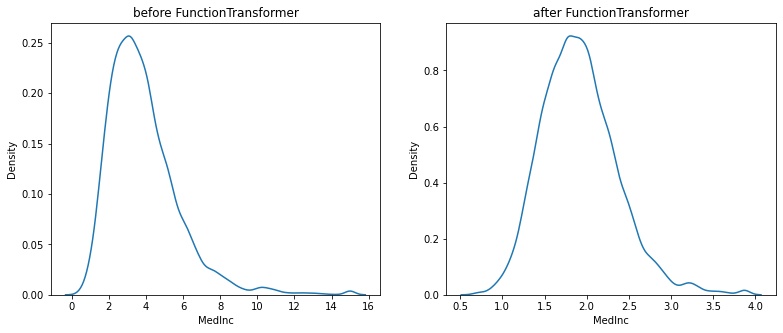

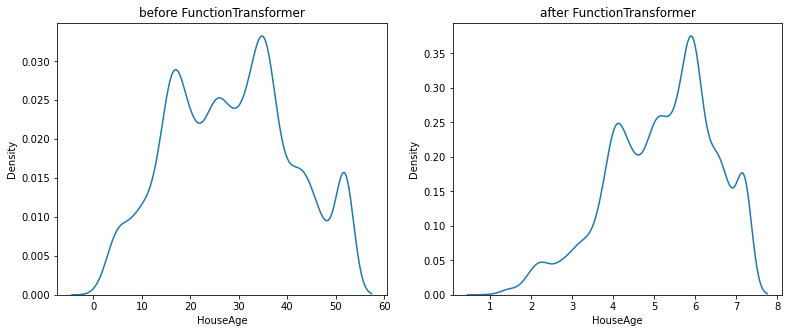

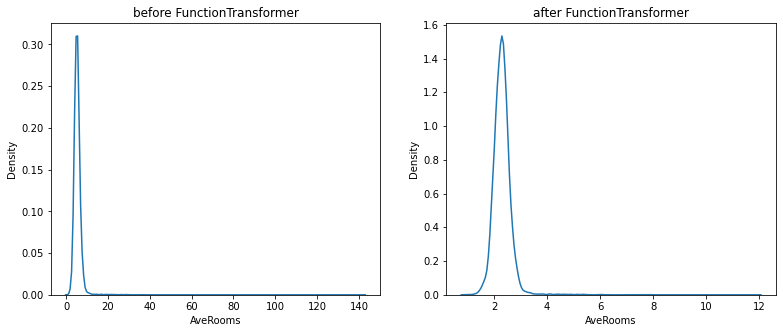

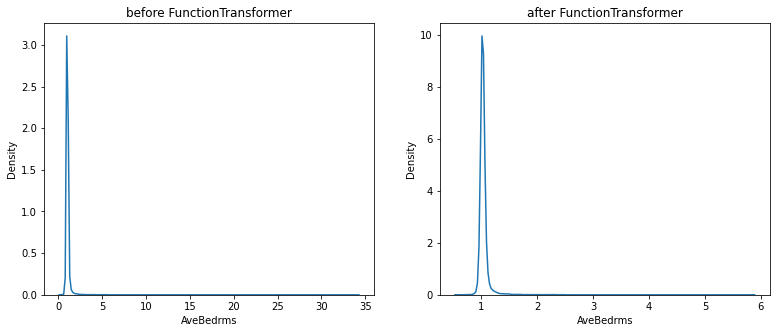

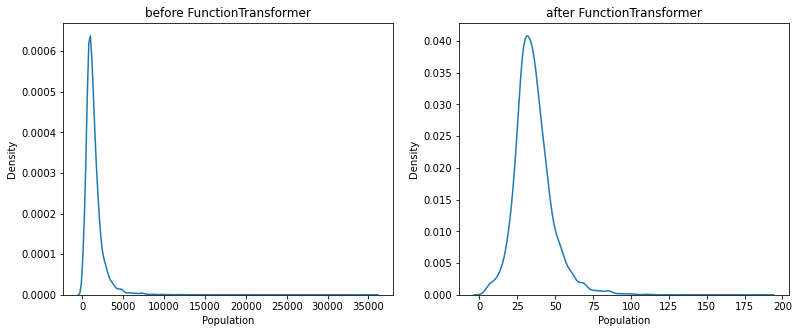

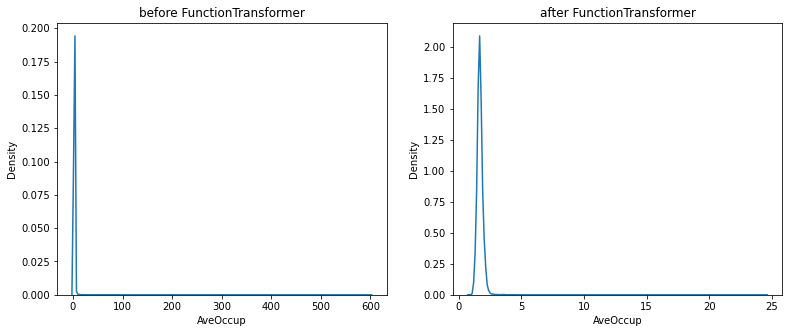

In [21]:
for col in X_train.columns:
    plots(X_train, col, FunctionTransformer(lambda x: x**(1/2))) #sqrt

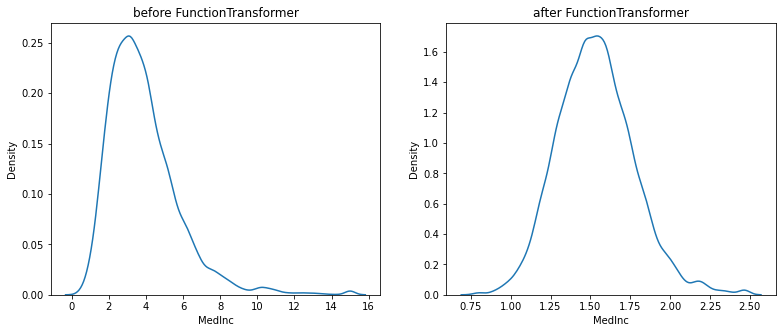

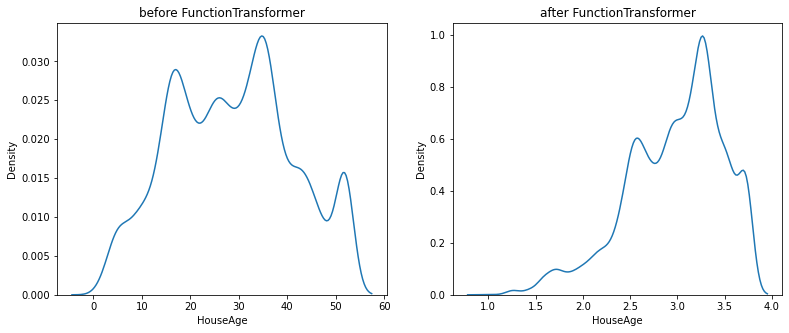

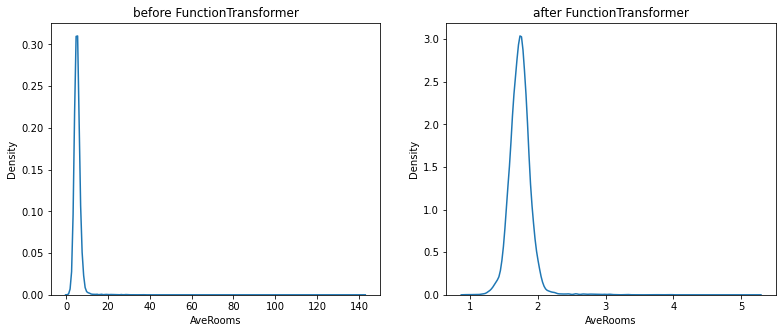

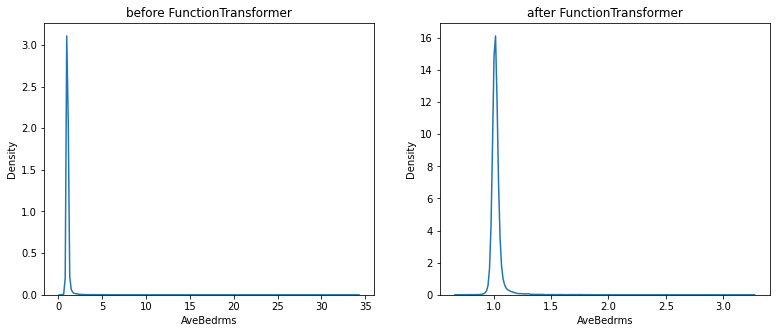

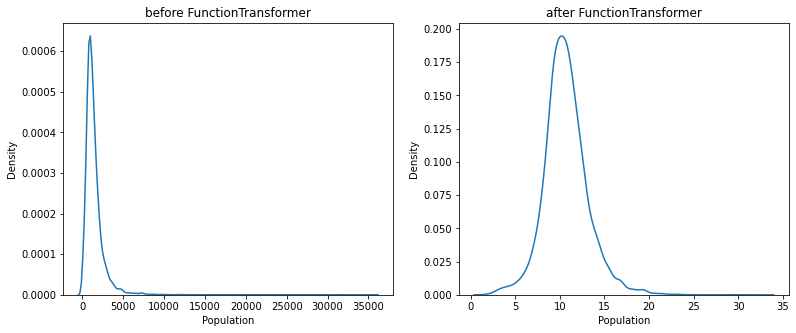

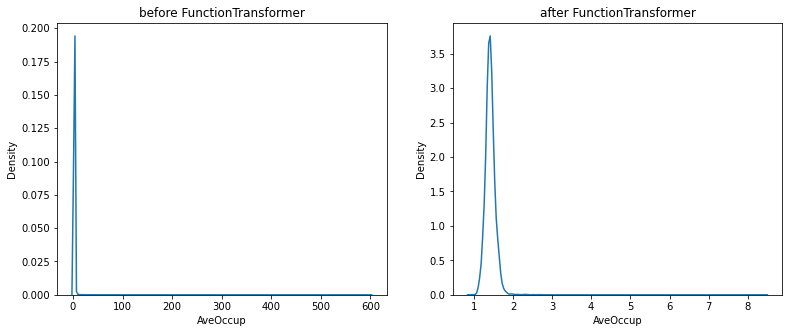

In [22]:
# cube root
for col in X_train.columns:
    plots(X_train, col, FunctionTransformer(lambda x: np.power(x, (1/3))))

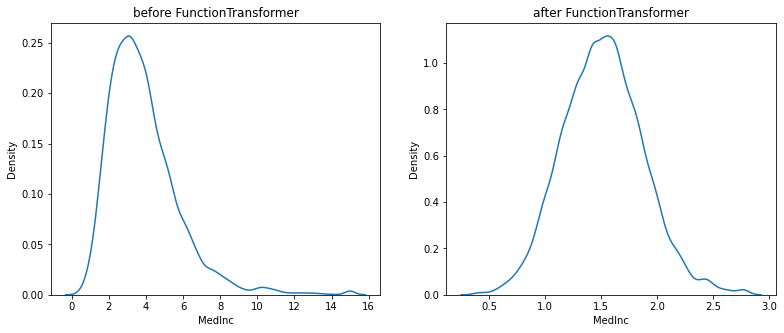

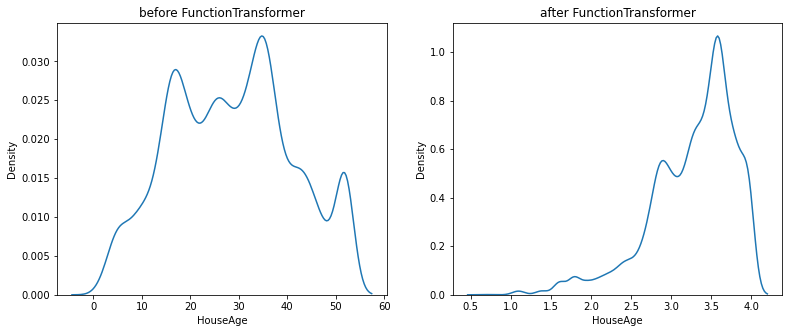

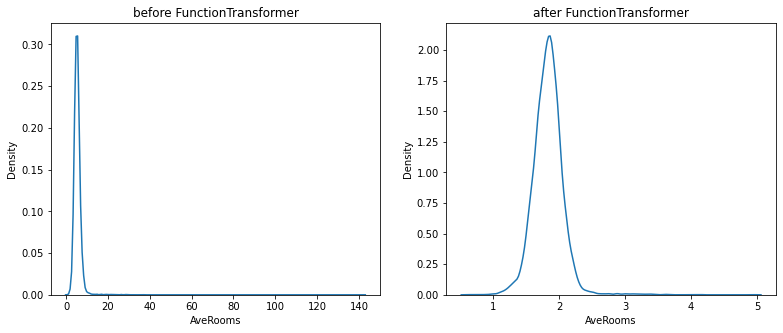

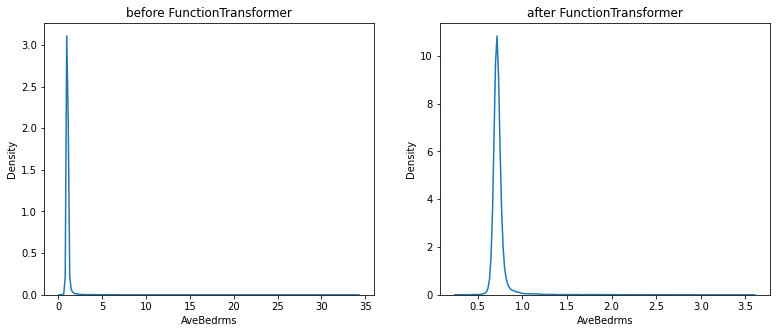

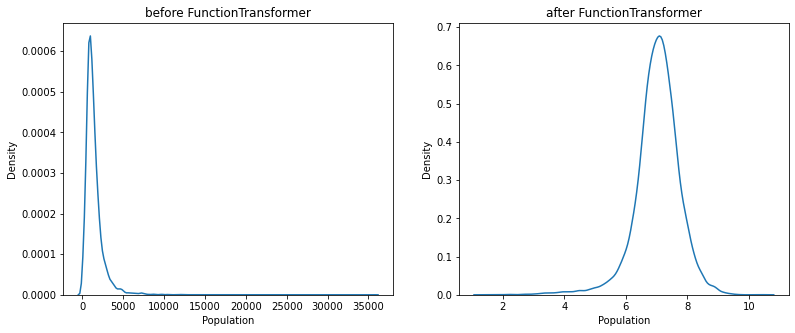

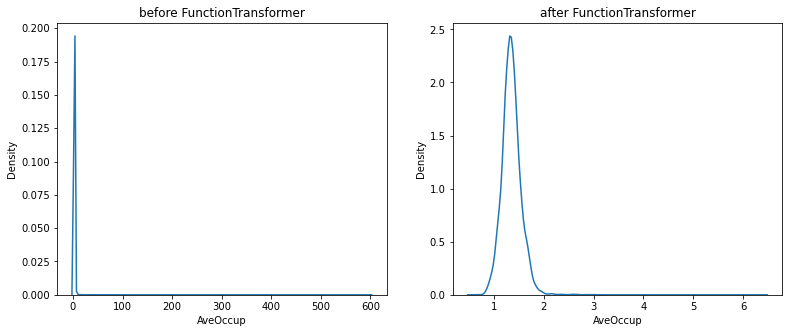

In [23]:
for col in X_train.columns:
    plots(X_train, col, FunctionTransformer(np.log1p)) #log

In [24]:
f = FunctionTransformer(lambda x: np.power(x, 1/2))

In [25]:
f.fit(X_train['HouseAge'])
f.transform(X_train[['HouseAge']]).head()

,HouseAge
12069,2.449490
15925,7.211103
11162,5.099020
4904,6.164414
4683,7.211103


In [26]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', FunctionTransformer(np.log1p)),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)



In [27]:
model_accuracy_scaled(KNeighborsRegressor())

0.6191691660189492

In [28]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

In [29]:
model_accuracy_scaled(RandomForestRegressor(random_state=0))

0.6684160898895763

In [30]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.6687567614986214